<a href="https://colab.research.google.com/github/ReidelVichot/DSTEP23/blob/main/week_3/dstep23_world_bank_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **DSTEP23 // World Bank: GDP per Capita and Life Expectancy**

*September 14, 2023*

This notebook will explore the relationship between GDP per capita and life expectancy at birth using pre-processed$^{\dagger}$ World Bank data.

<small><i>$^{\dagger}$ we'll look at <u>how</u> the data was pre-processed in the coming weeks. </i></small>

---

The first step is to create the link between the virtual machine running on Google's computational platform and our Google Drive containing the data.

In [1]:
# -- link google drive
#I am not doing it because I saved the dataset on GitHub
#from google.colab import drive
#drive.mount("/content/drive")

Import useful modules:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Now we load the data directly into this Colaboratory python runtime using pandas.

In [3]:
# -- read in the data
fname = "https://raw.githubusercontent.com/ReidelVichot/DSTEP23/main/data/world_bank_gdp_leb.csv"
wb = pd.read_csv(fname)

# -- check that data was read in correctly
print(wb.head())

                country       gdp2017  leb2017     pop2017       gpc2017
0                 Aruba  2.700559e+09   76.010    105366.0  25630.266492
1           Afghanistan  2.019176e+10   64.130  36296400.0    556.302139
2                Angola  1.221238e+11   60.379  29816748.0   4095.812942
3               Albania  1.302506e+10   78.333   2873457.0   4532.890162
4  United Arab Emirates  3.777011e+11   77.647   9487203.0  39811.634702


As an example of working with this DataFrame, let's sort "in place" by GDP per Capita in 2017 to find the lowest 5 values:

In [4]:
# -- sort in place by GDP per Capita in 2017
wb = wb.sort_values("gpc2017")

#print(wb.head())

---

### **Exploring summary statistics with Pandas and NumPy**

Let's look at some summary statistics for the data.  Pandas DataFrames have a "describe" method:

In [5]:
# -- summarize the DataFrame using the describe method

wb.describe()

,gdp2017,leb2017,pop2017,gpc2017
count,1.870000e+02,187.000000,1.870000e+02,187.000000
mean,4.261212e+11,72.366306,3.956944e+07,14141.172268
std,1.764523e+12,7.627526,1.454835e+08,19179.316988
min,1.855725e+08,52.240000,9.542600e+04,292.997631
25%,9.205012e+09,67.264500,2.086704e+06,1990.934934
50%,3.792629e+10,73.992000,8.451840e+06,5646.456008
75%,2.138045e+11,77.736915,2.824191e+07,17136.270746
max,1.948539e+13,84.680488,1.386395e+09,107361.306947


though there is not much [flexibility](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).

As we did with sea level, we can also visualize how one column varies with another,

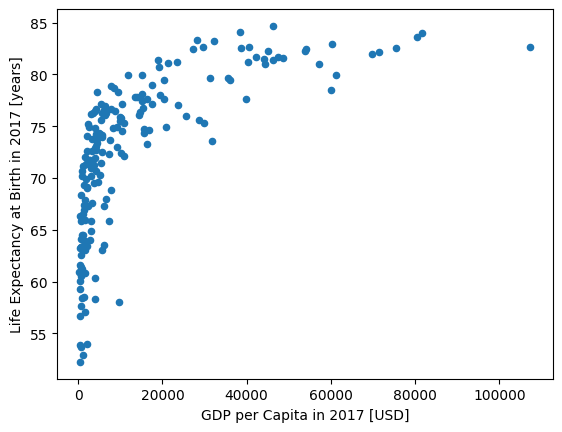

In [6]:
# -- make a scatter plot of Life Expectancy at Birth in 2017 versus GDP per
#    Capita in 2017
fig, ax = plt.subplots()
wb.plot("gpc2017", "leb2017", kind="scatter", ax=ax)
ax.set_xlabel("GDP per Capita in 2017 [USD]")
ax.set_ylabel("Life Expectancy at Birth in 2017 [years]")
fig.show()

How would we characterize this relationship?  Linear?

What about a "scatter plot" with the log of the GDP?$^*$

<small></i> $^*$ Recall that you can modify column values by using square brackets and the name of the column.  If the column does not exist in the DataFrame, the column is created. </i></small>

In [7]:
# -- calculate the log of the GDP per Capita
wb["log10gpc"] = np.log10(wb["gpc2017"])

In [8]:
# -- print out the GDP per capita and the log of the GDP per capita
cols = ["gpc2017", "log10gpc"]
print(wb[cols])

           gpc2017  log10gpc
11      292.997631  2.466864
152     309.055355  2.490036
120     356.717573  2.552325
123     375.869490  2.575037
28      449.786424  2.653006
..             ...       ...
82    71314.774196  4.853180
127   75496.754058  4.877928
30    80450.045820  4.905526
105   81516.674925  4.911246
103  107361.306947  5.030848

[187 rows x 2 columns]


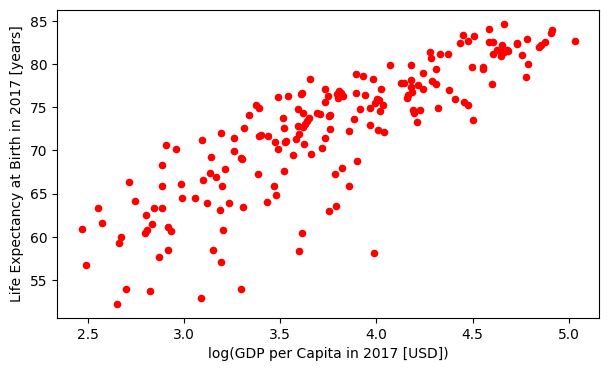

In [9]:
# -- make a scatter plot of Life Expectancy at Birth in 2017 versus the log of
#    GDP per Capita (in USD) in 2017
fig, ax = plt.subplots(figsize=(7,4))
wb.plot("log10gpc", "leb2017", kind="scatter", color="r", ax=ax)
ax.set_xlabel("log(GDP per Capita in 2017 [USD])")
ax.set_ylabel("Life Expectancy at Birth in 2017 [years]")
fig.show()

---

### **Fitting a linear model to the data.**

There are several ways to implement OLS in python.  Let's use the `statsmodels` module:

In [10]:
# -- import statmodels using the formula api
import statsmodels.formula.api as sm

In [12]:
# -- first build the model
model = sm.ols("leb2017 ~ log10gpc", data=wb)

# -- now fit the model to the data
result = model.fit()

We can see a summary of how the model performs:

In [14]:
# -- summarize the model fit
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                leb2017   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     461.6
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           3.73e-52
Time:                        22:04:41   Log-Likelihood:                -527.78
No. Observations:                 187   AIC:                             1060.
Df Residuals:                     185   BIC:                             1066.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.3729      1.839     18.142      0.0

Finally, let's determine the model "predictions" for the data,

In [15]:
# -- calculate the model "prediction" of Life Expectancy at Birth for each
#    log(GDP per Capita) data point
pred = result.predict(wb)

and overplot the model on the data.

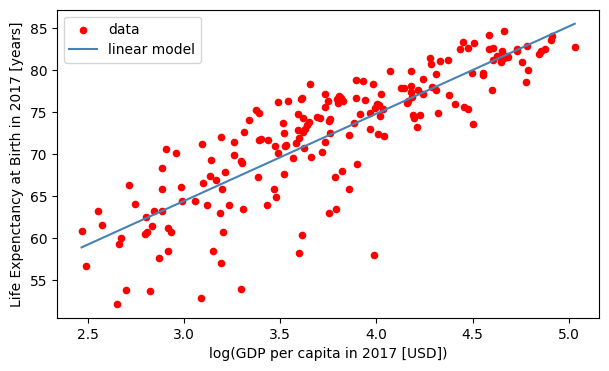

In [20]:
# -- make a scatter plot of Life Expectancy at Birth in 2017 versus the log of
#    GDP per Capita (in USD) in 2017 and overlay an OLS fit
fig, ax = plt.subplots(figsize=(7,4))
wb.plot("log10gpc", "leb2017", kind="scatter", color="r",label="data", ax=ax)
ax.plot(wb["log10gpc"], pred, color="steelblue", label="linear model")
ax.set_xlabel("log(GDP per capita in 2017 [USD])")
ax.set_ylabel("Life Expenctancy at Birth in 2017 [years]")
ax.legend()
fig.show()


---

### **Comparing the fit with a more complex model**

It **<i>may</i>** be that there is a slight decrease in life expectancy at birth at lower GDP per capita.  Let's try to model this with a quadratic function and compare the two models with a likelihood-ratio test.

LINEAR model <br>
$y = a_0 + a_1 \cdot x$
<br><br>
QUADRATIC model <br>
$y = a_0 + a_1 \cdot x + a_2 \cdot x^2$

First, we fit the quadratic model:

In [22]:
# -- build the quadratic model
model2 = sm.ols("leb2017 ~ log10gpc + np.power(log10gpc, 2)", data = wb)

# -- now fit the model to the data
result2 = model2.fit()

# -- summarize the fit
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                leb2017   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     234.4
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           2.50e-51
Time:                        22:15:42   Log-Likelihood:                -526.37
No. Observations:                 187   AIC:                             1059.
Df Residuals:                     184   BIC:                             1068.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                16.69

Let's overplot the two models now,

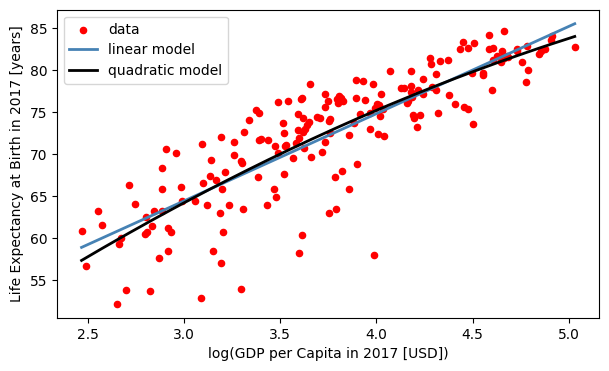

In [23]:
# -- make a scatter plot of Life Expectancy at Birth in 2017 versus the log of
#    GDP per Capita (in USD) in 2017 and overlay an OLS fit

# -- predict the GDP per capita with the new model
pred2 = result2.predict(wb)

# -- make the plot
fig, ax = plt.subplots(figsize=(7, 4))
wb.plot.scatter("log10gpc", "leb2017", color="red", ax=ax, label="data")
ax.plot(wb["log10gpc"], pred, color="steelblue", lw=2, label="linear model")
ax.plot(wb["log10gpc"], pred2, color="black", lw=2, label="quadratic model")
ax.set_xlabel("log(GDP per Capita in 2017 [USD])")
ax.set_ylabel("Life Expectancy at Birth in 2017 [years]")
ax.legend()
fig.show()

Does a likelihood ratio test indicate that the null hypothesis is rejected?  Because these models are "nested" (i.e., the first model is just a special case of the second) we can use statsmodels likelihood ratio test:

In [29]:
# -- likelihood ratio test
lr, pval, ddof = result2.compare_lr_test(result)
print("p-value: {0}".format(round(pval, 3)))

p-value: 0.092


This p-value indicates that the null hypothesis (that a straight line is an equally good fit to the data) is **<i>not</i>** rejected.  I.e., there is no reason to include the quadratic term in the fit.

Conicidentally, we can also extrapolate the result to values outside the fit range.  Let's predict the life expectancy at birth for a country with log(GDP per capita) = 6,

In [31]:
# -- create a DataFrame for extrapolation
df = pd.DataFrame()
df["log10gpc"] = [6]

In [32]:
df

,log10gpc
0,6


In [33]:
# -- predicting a value outisde the fit range
ext = result.predict(df)
ext2 = result2.predict(df)

print("linear model extrapolation:")
print(ext)

print("")

print("quadratic model extrapolation")
print(ext2)

linear model extrapolation:
0    95.533386
dtype: float64

quadratic model extrapolation
0    89.865385
dtype: float64


We can also predict at multiple values using lists:

In [34]:
# -- create a DataFrame for extrapolation
df = pd.DataFrame()
df["log10gpc"] = [6, 6.5, 7, 7.5, 8]

In [35]:
# -- predicting a value outisde the fit range
extm = result.predict(df)
extm2 = result2.predict(df)

print("linear model extrapolation:")
print(extm)

print("")

print("quadratic model extrapolation")
print(extm2)

linear model extrapolation:
0     95.533386
1    100.713425
2    105.893464
3    111.073504
4    116.253543
dtype: float64

quadratic model extrapolation
0    89.865385
1    92.008792
2    93.543839
3    94.470526
4    94.788853
dtype: float64
